# Práctica Grupal: Diseño de Base de Datos

Para esta práctica diseñamos una base de datos en función de lo solicitado. Este sería el resultado:
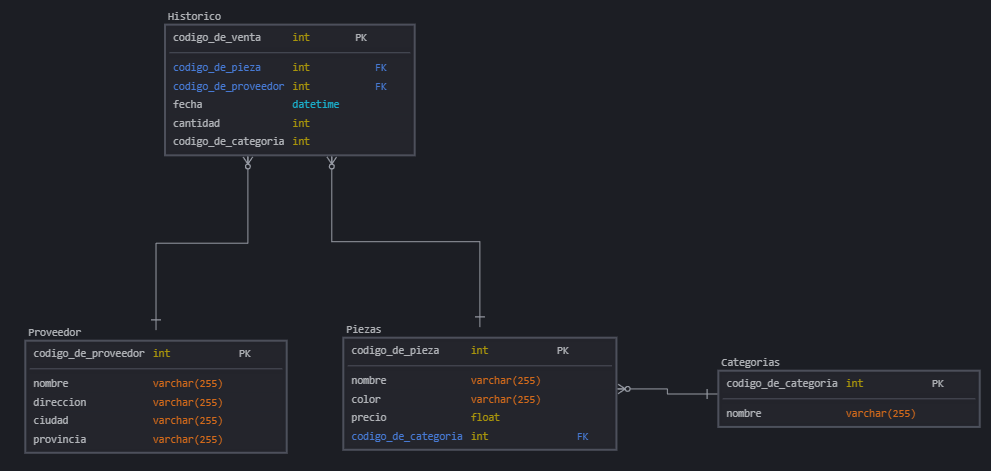

Dividimos la db en 4 tablas:

1. Tabla Proveedores
    - Aquí almacenamos los datos relacionados con los proveedores. Tenemos un campo codigo_de_proveedor que sirve como clave principal.

2. Tabla Historico
    - En esta tabla se almacenan los datos de cada compra, para poder saber qué proveedor nos vendió qué pieza y cuando.

3. Tabla Piezas
    - Aqui almacenamos los distintos tipos de piezas que hay.

4. Tabla Categorias
    - En esta tabla se almacenan unicamente las categorías de las piezas, se une con la tabla Piezas a través del codigo_de_categoria


## Extra: Script para generar la db e introducir datos

In [ ]:
import sqlite3

# creamos el archivo y abrimos una conexion
archivo_sql = sqlite3.connect('data/team_challenge_2.sql')
conn = archivo_sql.cursor()

# query que crea las tablas de la db
query_crear_tablas = '''
CREATE TABLE IF NOT EXISTS Proveedor (

    codigo_de_proveedor       INT IDENTITY(1,1),
    nombre                    VARCHAR(255) NOT NULL,
    direccion                 VARCHAR(255) NOT NULL,
    ciudad                    VARCHAR(255) NOT NULL,
    provincia                 VARCHAR(255) NOT NULL,

    PRIMARY KEY (codigo_de_proveedor)

);

CREATE TABLE IF NOT EXISTS Categorias (

    codigo_de_categoria       INT IDENTITY(1,1),
    nombre                    VARCHAR(255) NOT NULL,

    PRIMARY KEY (codigo_de_categoria)

);

CREATE TABLE IF NOT EXISTS Piezas (

    codigo_de_pieza       INT IDENTITY(1,1),
    nombre                VARCHAR(255) NOT NULL,
    color                 VARCHAR(255) NOT NULL,
    precio                FLOAT NOT NULL,
    codigo_de_categoria   VARCHAR(255) NOT NULL,

    PRIMARY KEY (codigo_de_pieza)
    FOREIGN KEY (codigo_de_categoria) REFERENCES Categorias(codigo_de_categoria)

);

CREATE TABLE IF NOT EXISTS Historico (

    codigo_de_venta         INT IDENTITY(1,1),
    codigo_de_pieza         VARCHAR(255) NOT NULL,
    codigo_de_proveedor     VARCHAR(255) NOT NULL,
    fecha                   VARCHAR(255) NOT NULL,
    cantidad                INT,
    codigo_de_categoria     INT,

    PRIMARY KEY (codigo_de_venta)
    FOREIGN KEY (codigo_de_pieza) REFERENCES Piezas(codigo_de_pieza)
    FOREIGN KEY (codigo_de_proveedor) REFERENCES Proveedor(codigo_de_proveedor)

);

'''

# queries para insertar datos
query_datos_proveedor = '''
INSERT INTO Proveedor (nombre, direccion, ciudad, provincia) VALUES
('Proveedor A', 'Calle Falsa 123', 'Madrid', 'Madrid'),
('Proveedor B', 'Av. Siempre Viva 742', 'Barcelona', 'Cataluña'),
('Proveedor C', 'Calle Luna 45', 'Sevilla', 'Andalucía');
'''

query_datos_categorias = '''
INSERT INTO Categorias (nombre) VALUES
('Electrónica'),
('Mecánica'),
('Hidráulica');
'''

query_datos_piezas = '''
INSERT INTO Piezas (nombre, color, precio, codigo_de_categoria) VALUES
('Resistor', 'Rojo', 0.15, 1),
('Tornillo M8', 'Plateado', 0.05, 2),
('Bomba hidráulica', 'Negro', 125.00, 3);
'''

query_datos_historico = '''
INSERT INTO Historico (codigo_de_pieza, codigo_de_proveedor, fecha, cantidad, codigo_de_categoria) VALUES
(1, 1, '2024-12-01', 100, 1),
(2, 2, '2025-01-15', 250, 2),
(3, 3, '2025-03-22', 10, 3),
(1, 2, '2025-04-01', 150, 1);
'''

# ejecutamos queries
conn.executescript(query_crear_tablas)
conn.executescript(query_datos_proveedor)
conn.executescript(query_datos_categorias)
conn.executescript(query_datos_piezas)
conn.executescript(query_datos_historico)

# queries para visualizar datos
ver_tablas = '''
SELECT *
FROM sqlite_master
WHERE type == 'table'
'''

ver_tablas_con_datos = '''
SELECT *
FROM Proveedor, Categorias, Piezas, Historico
'''

conn.execute(ver_tablas)
conn.execute(ver_tablas_con_datos)
conn.fetchall()